In [12]:
# Imports
import pandas as pd

# Read data
df = pd.read_csv('data/mental_health.csv')

# Print a few data points
print(df.head())

print("\nShape of the DataFrame:", df.shape)

                                                text  label
0  dear american teens question dutch person hear...      0
1  nothing look forward lifei dont many reasons k...      1
2  music recommendations im looking expand playli...      0
3  im done trying feel betterthe reason im still ...      1
4  worried  year old girl subject domestic physic...      1

Shape of the DataFrame: (27977, 2)


In [13]:
# We disregard blank / white space only data points, are there any?
blank_rows = df[df['text'].str.strip() == '']

# Print out the exact row index of the blank rows
print("Indices of blank rows:", blank_rows.index.tolist())

Indices of blank rows: [6579, 13183]


In [49]:
# Remove the blank rows from the DataFraQme
df = df[df['text'].str.strip() != '']

# Print the shape of the DataFrame after removing blank rows
print("Shape of the DataFrame after removing blank rows:", df.shape)

Shape of the DataFrame after removing blank rows: (27975, 3)


In [15]:
print(df.head())

print("\nShape of the DataFrame:", df.shape)

                                                text  label
0  dear american teens question dutch person hear...      0
1  nothing look forward lifei dont many reasons k...      1
2  music recommendations im looking expand playli...      0
3  im done trying feel betterthe reason im still ...      1
4  worried  year old girl subject domestic physic...      1

Shape of the DataFrame: (27975, 2)


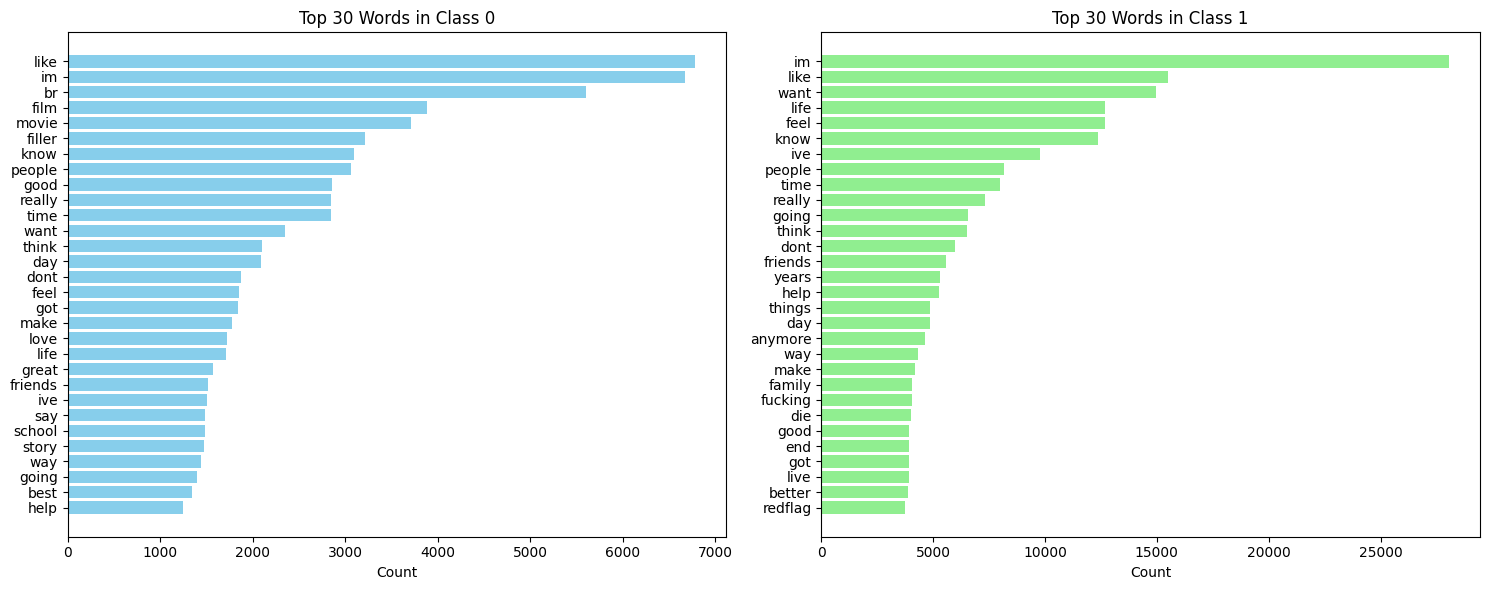

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

# Function to plot top 20 common words for each class
def plot_top_words(df, class_label, ax):
    k = 30
    vectorizer = CountVectorizer(stop_words='english')
    word_count = vectorizer.fit_transform(df[df['label'] == class_label]['text'])
    word_sum = word_count.sum(axis=0)
    words = vectorizer.get_feature_names_out()
    word_freq = [(words[i], word_sum[0, i]) for i in range(len(words))]
    word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)[:30]
    
    words, counts = zip(*word_freq)
    ax.barh(words, counts, color='skyblue' if class_label == 0 else 'lightgreen')
    ax.set_title(f'Top {k} Words in Class {class_label}')
    ax.set_xlabel('Count')
    ax.invert_yaxis()  # Invert y-axis for better readability

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot for class 0
plot_top_words(df, class_label=0, ax=axs[0])
# Plot for class 1
plot_top_words(df, class_label=1, ax=axs[1])

plt.tight_layout()
plt.show()

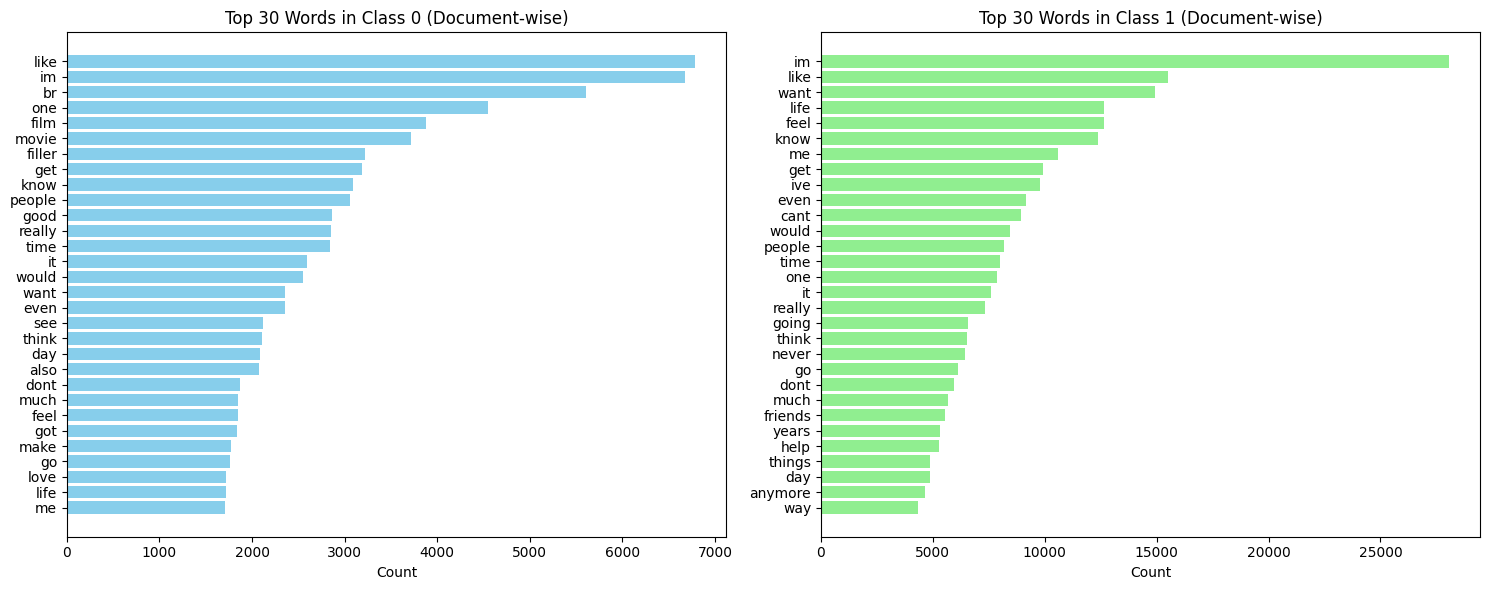

In [29]:
# Function to get word frequencies document-wise and aggregate them across the class
def get_aggregated_word_freq(df, class_label, top_k=30):
    # Initialize Counter to aggregate word counts
    word_counter = Counter()

    # For each document in the given class, count the words
    for doc in df[df['label'] == class_label]['text']:
        words = doc.split()  # Split document into words
        word_counter.update(words)  # Update the counter with the document words

    # Get the top k most common words
    most_common_words = word_counter.most_common(top_k)
    
    return most_common_words

# Function to plot the aggregated top words
def plot_top_words(df, class_label, ax, top_k=30):
    word_freq = get_aggregated_word_freq(df, class_label, top_k=top_k)
    
    # Extract words and counts
    words, counts = zip(*word_freq)
    
    # Plotting
    ax.barh(words, counts, color='skyblue' if class_label == 0 else 'lightgreen')
    ax.set_title(f'Top {top_k} Words in Class {class_label} (Document-wise)')
    ax.set_xlabel('Count')
    ax.invert_yaxis()  # Invert y-axis for better readability

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot for class 0 (non-poisonous comments)
plot_top_words(df, class_label=0, ax=axs[0])
# Plot for class 1 (poisonous comments)
plot_top_words(df, class_label=1, ax=axs[1])

plt.tight_layout()
plt.show()

In [25]:
# Function to check for numbers in the entire corpus
def check_for_numbers_in_corpus(df):
    # Check if any comment contains a digit
    for comment in df['text']:
        if any(char.isdigit() for char in comment):
            return True
    return False

# Check the corpus for numbers
if check_for_numbers_in_corpus(df):
    print("There are numbers in the corpus!")
else:
    print("No numbers found in the corpus.")

No numbers found in the corpus.


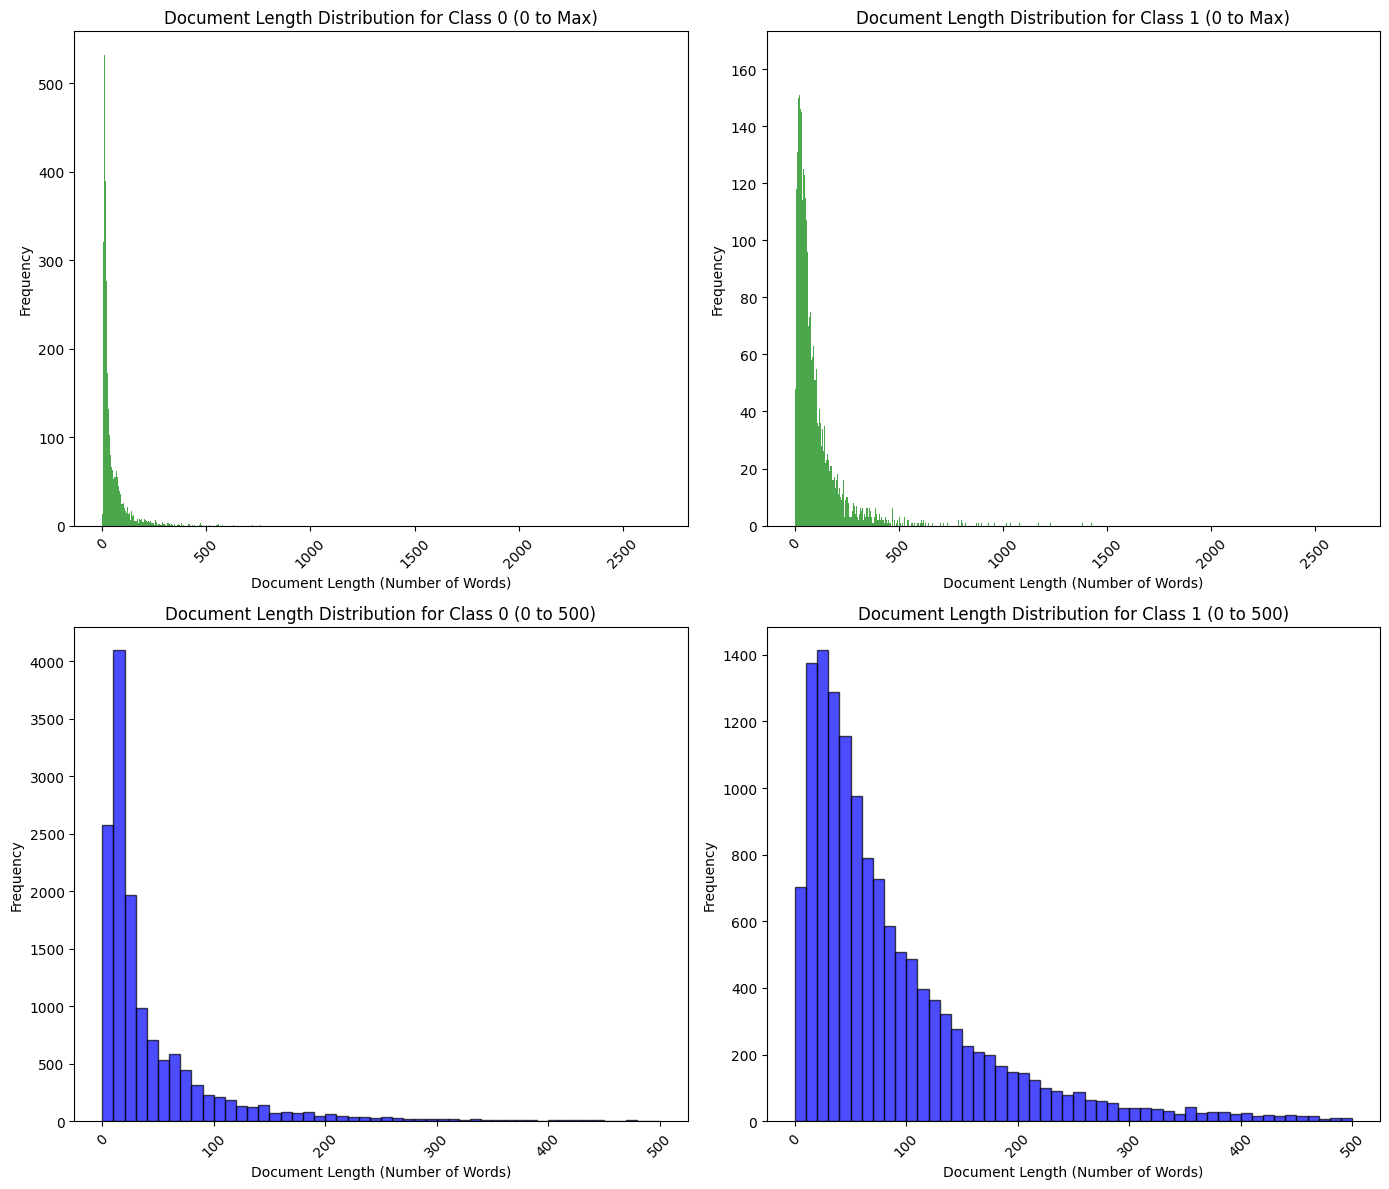

Statistics for Class 0:
Average Document Length (word count): 47.39093223935493
Minimum Document Length (word count): 1
Maximum Document Length (word count): 1462

Statistics for Class 1:
Average Document Length (word count): 96.66835296668353
Minimum Document Length (word count): 1
Maximum Document Length (word count): 2676



In [19]:
# Calculate the document length (number of words) for each comment
df['document_length'] = df['text'].str.split().str.len()

# Create a figure with four subplots for each class
plt.figure(figsize=(14, 12))

# Function to plot document length distribution for a given class
def plot_document_length_distribution(class_label, ax, title_suffix):
    ax.hist(df['document_length'][df['label'] == class_label], bins=range(0, df['document_length'].max() + 2), 
            alpha=0.7, color='green')
    ax.set_title(f'Document Length Distribution for Class {class_label} {title_suffix}')
    ax.set_xlabel('Document Length (Number of Words)')
    ax.set_ylabel('Frequency')
    ax.tick_params(axis='x', rotation=45)

# First row: Distribution from 0 to max for both classes
plt.subplot(2, 2, 1)
plot_document_length_distribution(0, plt.gca(), '(0 to Max)')

plt.subplot(2, 2, 2)
plot_document_length_distribution(1, plt.gca(), '(0 to Max)')

# Second row: Distribution from 0 to 500 for both classes
plt.subplot(2, 2, 3)
plt.hist(df['document_length'][(df['label'] == 0) & (df['document_length'] <= 500)], 
         bins=range(0, 502, 10), alpha=0.7, color='blue', edgecolor='black')
plt.title('Document Length Distribution for Class 0 (0 to 500)')
plt.xlabel('Document Length (Number of Words)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
plt.hist(df['document_length'][(df['label'] == 1) & (df['document_length'] <= 500)], 
         bins=range(0, 502, 10), alpha=0.7, color='blue', edgecolor='black')
plt.title('Document Length Distribution for Class 1 (0 to 500)')
plt.xlabel('Document Length (Number of Words)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Show the plots
plt.tight_layout()
plt.show()

# Print statistics for each class
for label in [0, 1]:
    print(f"Statistics for Class {label}:")
    print("Average Document Length (word count):", df['document_length'][df['label'] == label].mean())
    print("Minimum Document Length (word count):", df['document_length'][df['label'] == label].min())
    print("Maximum Document Length (word count):", df['document_length'][df['label'] == label].max())
    print()

In [30]:
# Set the number of top n-grams to display
k = 10

# Function to get top n-grams for a specific class
def get_top_ngrams(corpus, n=2, top_k=10):
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english')
    ngrams = vectorizer.fit_transform(corpus)
    ngrams_sum = ngrams.sum(axis=0)
    ngram_freq = [(word, ngrams_sum[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    ngram_freq = sorted(ngram_freq, key=lambda x: x[1], reverse=True)
    return ngram_freq[:top_k]

# Dictionary to store the results for plotting
ngram_results = {}

# Get top n-grams for both classes and each n-gram size
for n in range(2, 6):  # For bigrams to pentagrams (2 to 5)
    ngram_results[n] = {
        'class_0': get_top_ngrams(df[df['label'] == 0]['text'], n=n, top_k=k),
        'class_1': get_top_ngrams(df[df['label'] == 1]['text'], n=n, top_k=k)
    }

# Convert results to DataFrame for easier plotting
ngram_dfs = {}
for n in ngram_results:
    class_0_df = pd.DataFrame(ngram_results[n]['class_0'], columns=['ngram', 'frequency'])
    class_0_df['class'] = 0
    class_1_df = pd.DataFrame(ngram_results[n]['class_1'], columns=['ngram', 'frequency'])
    class_1_df['class'] = 1
    
    # Combine both classes into one DataFrame
    combined_df = pd.concat([class_0_df, class_1_df], ignore_index=True)
    ngram_dfs[n] = combined_df

Over entire corpus


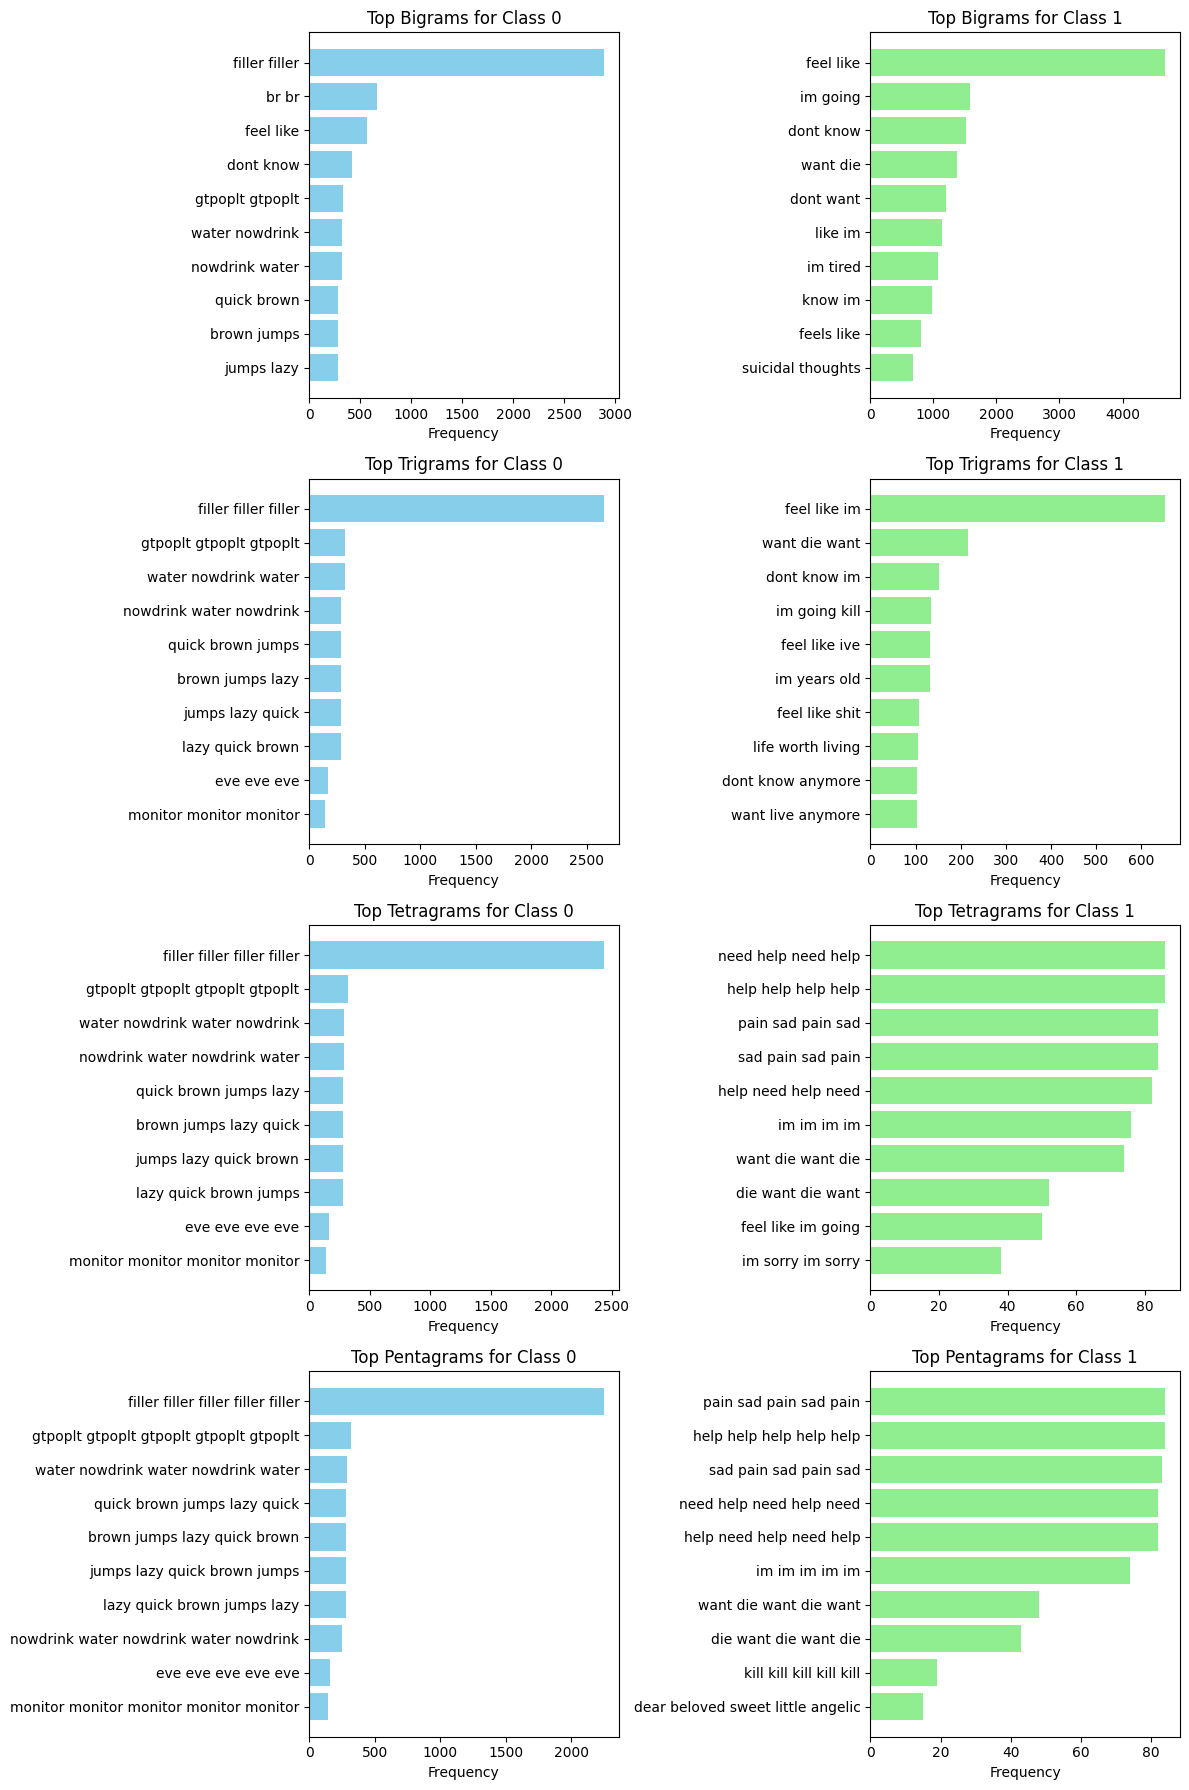

In [37]:
print("Over entire corpus")

# Create a figure with 8 subplots (4 for class 0 and 4 for class 1)
fig, axs = plt.subplots(4, 2, figsize=(12, 18))

# Define titles for the subplots
titles = [
    'Top Bigrams for Class 0',
    'Top Bigrams for Class 1',
    'Top Trigrams for Class 0',
    'Top Trigrams for Class 1',
    'Top Tetragrams for Class 0',
    'Top Tetragrams for Class 1',
    'Top Pentagrams for Class 0',
    'Top Pentagrams for Class 1'
]

# Plotting the n-grams
for i, n in enumerate(range(2, 6)):  # For n = 2, 3, 4, 5
    # Class 0
    class_0_data = ngram_dfs[n][ngram_dfs[n]['class'] == 0]
    axs[i, 0].barh(class_0_data['ngram'], class_0_data['frequency'], color='skyblue')
    axs[i, 0].set_title(titles[i * 2])
    axs[i, 0].set_xlabel('Frequency')
    axs[i, 0].invert_yaxis()  # Invert y-axis for better readability

    # Class 1
    class_1_data = ngram_dfs[n][ngram_dfs[n]['class'] == 1]
    axs[i, 1].barh(class_1_data['ngram'], class_1_data['frequency'], color='lightgreen')
    axs[i, 1].set_title(titles[i * 2 + 1])
    axs[i, 1].set_xlabel('Frequency')
    axs[i, 1].invert_yaxis()  # Invert y-axis for better readability

# Adjust layout
plt.tight_layout()
plt.show()

Document-wise n-grams


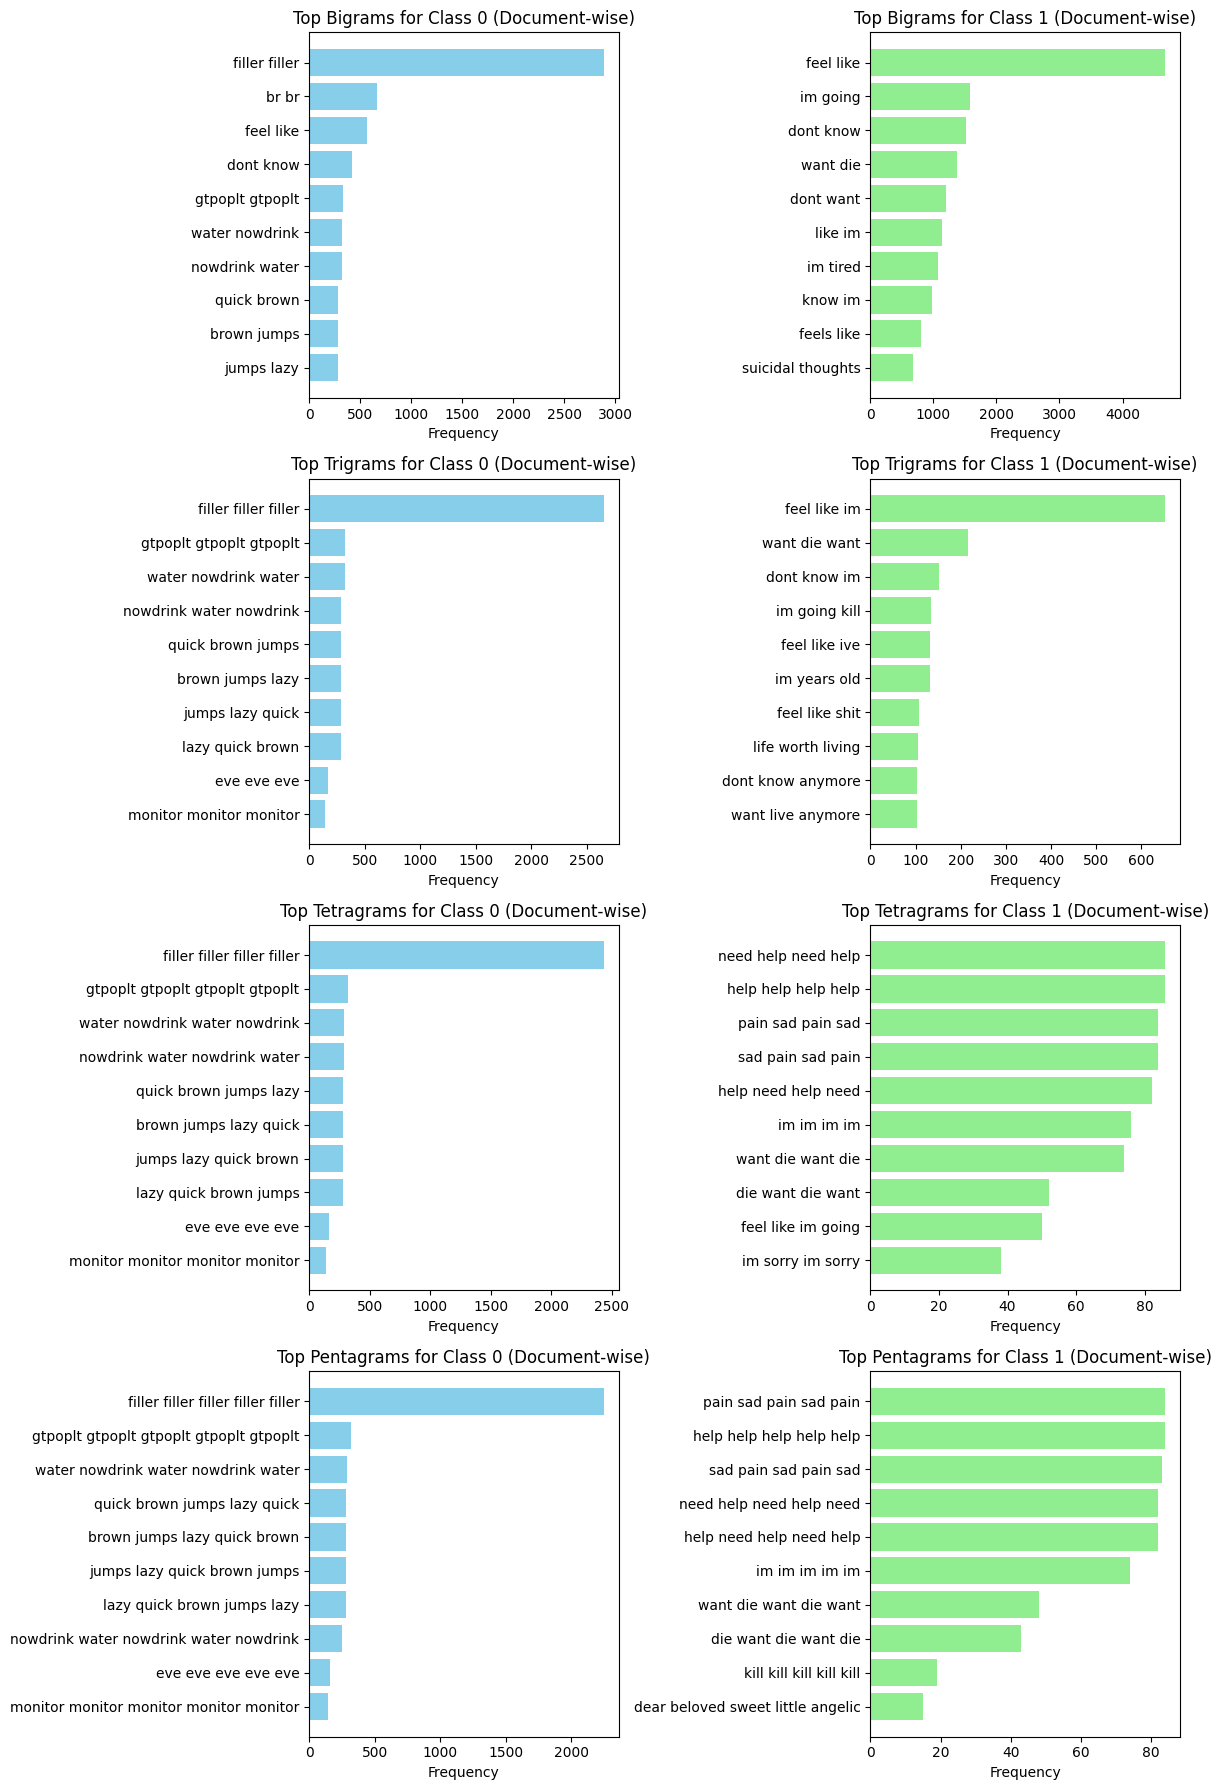

In [48]:
# Set the number of top n-grams to display
k = 10

# List to store indices of documents with empty vocabulary
empty_doc_indices = []

# Function to get document-wise top n-grams for a specific class
def get_document_wise_ngrams(corpus, indices, n=2, top_k=10):
    ngram_counter = Counter()
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english')
    
    # For each document in the class, extract the n-grams and update the counter
    for idx, doc in enumerate(corpus):
        if len(doc.strip()) == 0:  # Skip if document is empty or consists of only whitespace
            empty_doc_indices.append(indices[idx])
            continue
        try:
            ngrams = vectorizer.fit_transform([doc])
            if ngrams.shape[1] == 0:  # Skip if no n-grams were found
                empty_doc_indices.append(indices[idx])
                continue
            ngrams_sum = ngrams.sum(axis=0)
            ngram_freq = [(word, ngrams_sum[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
            ngram_counter.update(dict(ngram_freq))
        except ValueError:  # Handle the 'empty vocabulary' error
            empty_doc_indices.append(indices[idx])
            continue
    
    # Get the top k n-grams
    most_common_ngrams = ngram_counter.most_common(top_k)
    
    return most_common_ngrams

# Dictionary to store the results for plotting
ngram_results = {}

# Get top n-grams for both classes and each n-gram size (document-wise)
for n in range(2, 6):  # For bigrams to pentagrams (2 to 5)
    class_0_corpus = df[df['label'] == 0]['text']
    class_1_corpus = df[df['label'] == 1]['text']
    class_0_indices = df[df['label'] == 0].index
    class_1_indices = df[df['label'] == 1].index

    ngram_results[n] = {
        'class_0': get_document_wise_ngrams(class_0_corpus, class_0_indices, n=n, top_k=k),
        'class_1': get_document_wise_ngrams(class_1_corpus, class_1_indices, n=n, top_k=k)
    }

# Convert results to DataFrame for easier plotting
ngram_dfs = {}
for n in ngram_results:
    class_0_df = pd.DataFrame(ngram_results[n]['class_0'], columns=['ngram', 'frequency'])
    class_0_df['class'] = 0
    class_1_df = pd.DataFrame(ngram_results[n]['class_1'], columns=['ngram', 'frequency'])
    class_1_df['class'] = 1
    
    # Combine both classes into one DataFrame
    combined_df = pd.concat([class_0_df, class_1_df], ignore_index=True)
    ngram_dfs[n] = combined_df

print("Document-wise n-grams")

# Create a figure with 8 subplots (4 for class 0 and 4 for class 1)
fig, axs = plt.subplots(4, 2, figsize=(12, 18))

# Define titles for the subplots
titles = [
    'Top Bigrams for Class 0 (Document-wise)',
    'Top Bigrams for Class 1 (Document-wise)',
    'Top Trigrams for Class 0 (Document-wise)',
    'Top Trigrams for Class 1 (Document-wise)',
    'Top Tetragrams for Class 0 (Document-wise)',
    'Top Tetragrams for Class 1 (Document-wise)',
    'Top Pentagrams for Class 0 (Document-wise)',
    'Top Pentagrams for Class 1 (Document-wise)'
]

# Plotting the n-grams document-wise
for i, n in enumerate(range(2, 6)):  # For n = 2, 3, 4, 5
    # Class 0
    class_0_data = ngram_dfs[n][ngram_dfs[n]['class'] == 0]
    axs[i, 0].barh(class_0_data['ngram'], class_0_data['frequency'], color='skyblue')
    axs[i, 0].set_title(titles[i * 2])
    axs[i, 0].set_xlabel('Frequency')
    axs[i, 0].invert_yaxis()  # Invert y-axis for better readability

    # Class 1
    class_1_data = ngram_dfs[n][ngram_dfs[n]['class'] == 1]
    axs[i, 1].barh(class_1_data['ngram'], class_1_data['frequency'], color='lightgreen')
    axs[i, 1].set_title(titles[i * 2 + 1])
    axs[i, 1].set_xlabel('Frequency')
    axs[i, 1].invert_yaxis()  # Invert y-axis for better readability

# Adjust layout
plt.tight_layout()
plt.show()

# Print the indices of the documents with empty vocabulary
# print("Indices of documents with empty vocabulary:", empty_doc_indices)